## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9, 0.7, 0.5, 0.3, 0.1]

In [8]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.900000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

Epoch 49/50
50000/50000 [==============================] - 5s 97us/step - loss: 0.4501 - accuracy: 0.8390 - val_loss: 2.0426 - val_accuracy: 0.5144
Epoch 50/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.4384 - accuracy: 0.8449 - val_loss: 1.9812 - val_accuracy: 0.5234
Experiment with MOMENTUM = 0.700000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.8692 - accuracy: 0.6961 - val_loss: 1.4682 - val_accuracy: 0.5188
Epoch 48/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.8587 - accuracy: 0.6990 - val_loss: 1.4389 - val_accuracy: 0.5293
Epoch 49/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.8355 - accuracy: 0.7085 - val_loss: 1.5867 - val_accuracy: 0.4898
Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.8259 - accuracy: 0.7100 - val_loss: 1.5453 - val_accuracy: 0.4989
Experiment with MOMENTUM = 0.500000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________

Epoch 45/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.0948 - accuracy: 0.6167 - val_loss: 1.4059 - val_accuracy: 0.5084
Epoch 46/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.0803 - accuracy: 0.6204 - val_loss: 1.3861 - val_accuracy: 0.5154
Epoch 47/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.0743 - accuracy: 0.6228 - val_loss: 1.6968 - val_accuracy: 0.4492
Epoch 48/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.0679 - accuracy: 0.6241 - val_loss: 1.4504 - val_accuracy: 0.5093
Epoch 49/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.0541 - accuracy: 0.6310 - val_loss: 1.5012 - val_accuracy: 0.4868
Epoch 50/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.0465 - accuracy: 0.6326 - val_loss: 1.5309 - val_accuracy: 0.4667
Experiment with MOMENTUM = 0.300000
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.1931 - accuracy: 0.5833 - val_loss: 1.3314 - val_accuracy: 0.5270
Epoch 44/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.1765 - accuracy: 0.5890 - val_loss: 1.4289 - val_accuracy: 0.4824
Epoch 45/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.1764 - accuracy: 0.5874 - val_loss: 1.3780 - val_accuracy: 0.5138
Epoch 46/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.1666 - accuracy: 0.5923 - val_loss: 1.4981 - val_accuracy: 0.4712
Epoch 47/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.1619 - accuracy: 0.5918 - val_loss: 1.4167 - val_accuracy: 0.4935
Epoch 48/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.1538 - accuracy: 0.5952 - val_loss: 1.4434 - val_accuracy: 0.4970
Epoch 49/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.1438 - accuracy: 0.5980 - val_

Epoch 41/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2651 - accuracy: 0.5567 - val_loss: 1.4521 - val_accuracy: 0.4824
Epoch 42/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.2636 - accuracy: 0.5561 - val_loss: 1.4665 - val_accuracy: 0.4791
Epoch 43/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2566 - accuracy: 0.5597 - val_loss: 1.4604 - val_accuracy: 0.4828
Epoch 44/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.2498 - accuracy: 0.5621 - val_loss: 1.3643 - val_accuracy: 0.5099
Epoch 45/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2404 - accuracy: 0.5664 - val_loss: 1.4329 - val_accuracy: 0.4837
Epoch 46/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2371 - accuracy: 0.5654 - val_loss: 1.3950 - val_accuracy: 0.5097
Epoch 47/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.2263 - accuracy: 0.5712 - val_

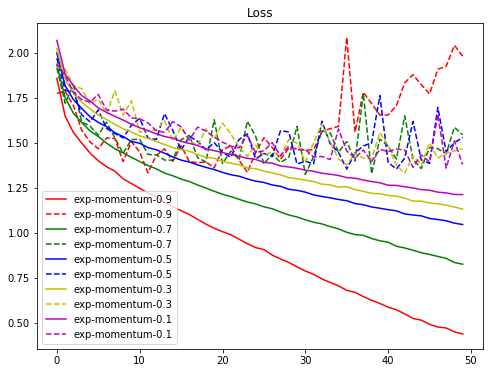

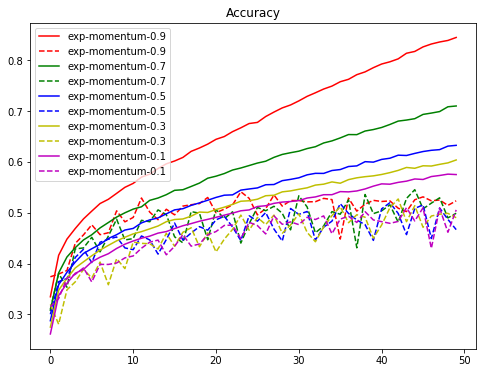

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.900000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

Epoch 49/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.5966 - accuracy: 0.7874 - val_loss: 1.6221 - val_accuracy: 0.5407
Epoch 50/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.5761 - accuracy: 0.7952 - val_loss: 1.6286 - val_accuracy: 0.5415
Experiment with MOMENTUM = 0.700000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.8601 - accuracy: 0.6981 - val_loss: 1.4557 - val_accuracy: 0.5180
Epoch 48/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.8446 - accuracy: 0.7012 - val_loss: 1.4045 - val_accuracy: 0.5387
Epoch 49/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.8325 - accuracy: 0.7084 - val_loss: 1.3883 - val_accuracy: 0.5418
Epoch 50/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.8185 - accuracy: 0.7126 - val_loss: 1.5365 - val_accuracy: 0.5034
Experiment with MOMENTUM = 0.500000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________

Epoch 45/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.0587 - accuracy: 0.6292 - val_loss: 1.7653 - val_accuracy: 0.4371
Epoch 46/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.0521 - accuracy: 0.6319 - val_loss: 1.3404 - val_accuracy: 0.5438
Epoch 47/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.0329 - accuracy: 0.6387 - val_loss: 1.4143 - val_accuracy: 0.5113
Epoch 48/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.0308 - accuracy: 0.6397 - val_loss: 1.4291 - val_accuracy: 0.5122
Epoch 49/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.0233 - accuracy: 0.6401 - val_loss: 1.5240 - val_accuracy: 0.4818
Epoch 50/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.0065 - accuracy: 0.6464 - val_loss: 1.4607 - val_accuracy: 0.5103
Experiment with MOMENTUM = 0.300000
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.1617 - accuracy: 0.5939 - val_loss: 1.3561 - val_accuracy: 0.5152
Epoch 44/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.1567 - accuracy: 0.5933 - val_loss: 1.5568 - val_accuracy: 0.4579
Epoch 45/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.1523 - accuracy: 0.5961 - val_loss: 1.4247 - val_accuracy: 0.4966
Epoch 46/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.1350 - accuracy: 0.6017 - val_loss: 1.3519 - val_accuracy: 0.5211
Epoch 47/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.1291 - accuracy: 0.6061 - val_loss: 1.3526 - val_accuracy: 0.5217
Epoch 48/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.1198 - accuracy: 0.6066 - val_loss: 1.4443 - val_accuracy: 0.4962
Epoch 49/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.1120 - accuracy: 0.6073 - val_

Epoch 41/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.2552 - accuracy: 0.5610 - val_loss: 1.4241 - val_accuracy: 0.5007
Epoch 42/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.2455 - accuracy: 0.5626 - val_loss: 1.4683 - val_accuracy: 0.4740
Epoch 43/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2423 - accuracy: 0.5645 - val_loss: 1.5027 - val_accuracy: 0.4698
Epoch 44/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.2381 - accuracy: 0.5648 - val_loss: 1.4156 - val_accuracy: 0.4939
Epoch 45/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.2269 - accuracy: 0.5687 - val_loss: 1.4370 - val_accuracy: 0.4952
Epoch 46/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.2195 - accuracy: 0.5722 - val_loss: 1.4514 - val_accuracy: 0.4796
Epoch 47/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2114 - accuracy: 0.5738 - val_

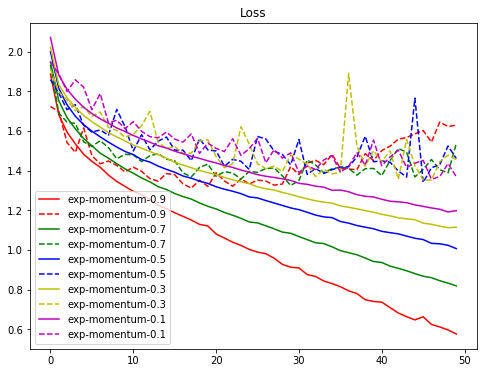

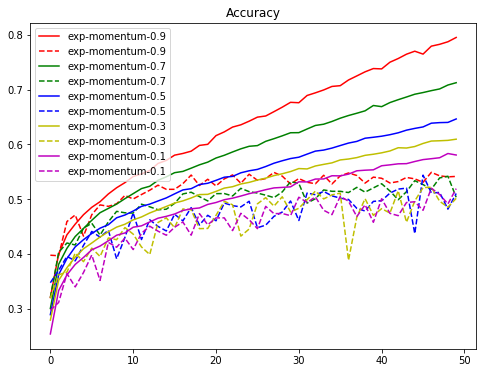

In [11]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()